                                          Product Name  Variance
2                               TEQUILA DON JULIO 1942  -2580.19
3                                  LIME FRESH SQUEEZED  -2428.52
4                             TEQUILA DON JULIO BLANCO  -1922.08
5                              SANGRIA ROSE WATERMELON  -1627.54
6                                  TEQUILA JOSE CUERVO  -1609.44
7                                        JUICE CLAMATO  -1582.50
8                              RED BULL CAN SUGAR FREE  -1553.84
9                                VODKA SMIRNOFF (WELL)  -1089.79
10                                      Lemon and Lime  -1062.00
11                                               limes   -953.00
12                                        RYE FIREBALL   -946.18
13                             RED BULL WATERMELON CAN   -913.23
14                        SANGRIA WHITE W/ FRUIT & ALC   -880.25
15                              BAR FOOD - TABASCO RED   -827.47
16                       

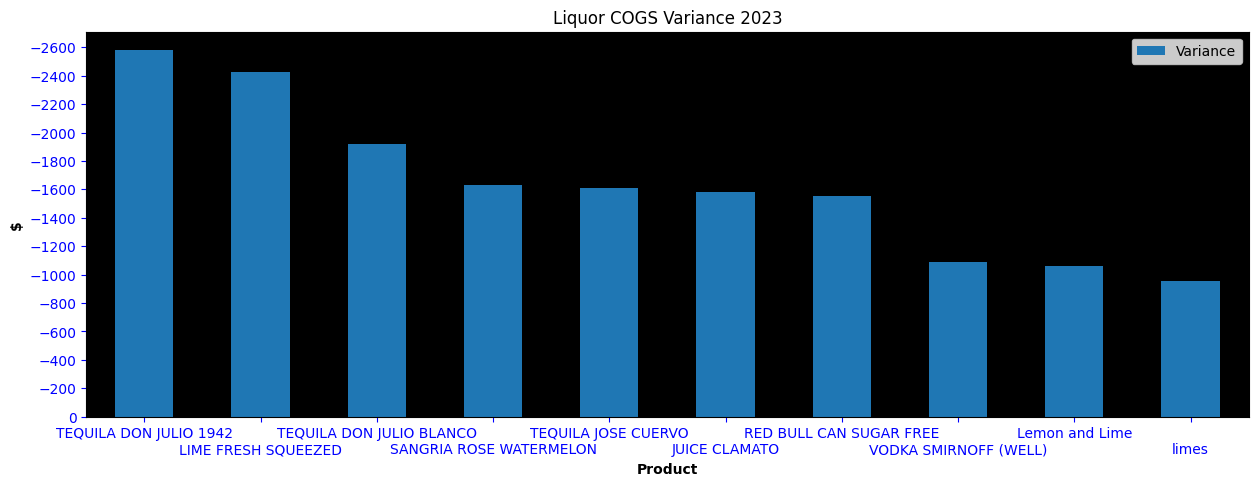

<Figure size 640x480 with 0 Axes>

In [35]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


pd.set_option('display.max_rows', None)
%run DocumentCleaner.ipynb

LDATA = DocClean("LiquorYear2023.csv")


LDATA['Variance'] = LDATA['Variance'].str.replace(',', '').astype(float)
LDATA['Product Name'] = LDATA["Product Name"].str.replace("BAR PREP PORTION 1L ", '')
LDATA['Product Name'] = LDATA["Product Name"].str.replace("BAR PREP PREMIX JUICE ", '')
LDATA['Product Name'] = LDATA["Product Name"].str.replace(" TRADICIONAL  SILVER", '')
LDATA['Product Name'] = LDATA["Product Name"].str.replace(" RED LABEL", '')

LDATA = LDATA.groupby(LDATA["Product Name"]).agg({"Variance": 'sum'}).sort_values("Variance").reset_index()

LDATA.drop([0,1], axis = 0, inplace = True)

ax = LDATA.head(10).plot.bar(x = "Product Name", y = "Variance", rot = 0, figsize = (15, 5))
for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(15)
ax.set_ylim(ax.get_ylim()[::-1])

    

plt.title("Liquor COGS Variance 2023")
plt.xlabel('Product',fontweight='bold')
plt.ylabel('$',fontweight='bold')
plt.tick_params(axis = 'x', labelsize = 10, colors = 'blue')
plt.tick_params(axis = 'y', labelsize = 10, colors = 'blue')
plt.locator_params(axis='y', nbins = 20)


ax.set_facecolor('black')

print(LDATA)